In [1]:
import re
import glob
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
import csv

In [2]:
S = ["10", "20", "50", "100"]
M = ["MINERVA", "MIDAS"]

In [3]:
# my_col = {"H_0-0.1": "#fec44f", "H_0-0.3": "#fe9929", "H_0-0.5": "#ec7014", "H_0-0.7": "#cc4c02", "H_0-0.9": "#8c2d04", "scVAEIT": "#958c8c"}
my_col = {"MINERVA": "#FA7F6F", "MIDAS": "#BEB8DC"}

In [4]:
data_rna = {}

for s in S:
    data_rna["Subset " + s + "%"] = {}
    for m in M:
        if m == "MINERVA":
            data_rna_name = "/root/workspace/sjh/data/paper/result/comparison/bmmc_sub" + s + "_test_1/all_motiFus/pearson_rna.csv"
            data_rna["Subset " + s + "%"]["MINERVA"] = data_rna_name
        else:
 
            data_rna_name = "/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub" + s + "_test_1/pearson_rna.csv"
            data_rna["Subset " + s + "%"]["MIDAS"] = data_rna_name

print(data_rna)

{'Subset 10%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub10_test_1/all_motiFus/pearson_rna.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub10_test_1/pearson_rna.csv'}, 'Subset 20%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub20_test_1/all_motiFus/pearson_rna.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub20_test_1/pearson_rna.csv'}, 'Subset 50%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub50_test_1/all_motiFus/pearson_rna.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub50_test_1/pearson_rna.csv'}, 'Subset 100%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub100_test_1/all_motiFus/pearson_rna.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub100_test_1/pearson_rna.csv'}}


In [5]:
data_adt = {}

for s in S:
    data_adt["Subset " + s + "%"] = {}
    for m in M:
        if m == "MINERVA":
            data_adt_name = "/root/workspace/sjh/data/paper/result/comparison/bmmc_sub" + s + "_test_1/all_motiFus/pearson_adt.csv"
            data_adt["Subset " + s + "%"]["MINERVA"] = data_adt_name
        else:
 
            data_adt_name = "/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub" + s + "_test_1/pearson_adt.csv"
            data_adt["Subset " + s + "%"]["MIDAS"] = data_adt_name

print(data_adt)

{'Subset 10%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub10_test_1/all_motiFus/pearson_adt.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub10_test_1/pearson_adt.csv'}, 'Subset 20%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub20_test_1/all_motiFus/pearson_adt.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub20_test_1/pearson_adt.csv'}, 'Subset 50%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub50_test_1/all_motiFus/pearson_adt.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub50_test_1/pearson_adt.csv'}, 'Subset 100%': {'MINERVA': '/root/workspace/sjh/data/paper/result/comparison/bmmc_sub100_test_1/all_motiFus/pearson_adt.csv', 'MIDAS': '/root/workspace/sjh/code/Compare/MIDAS/result/comparison/bmmc_sub100_test_1/pearson_adt.csv'}}


In [6]:
dfs_rna = []

for subset, subset_data in data_rna.items():
    for Model, csv_file in subset_data.items():
        with open(csv_file, newline='', encoding='utf-8') as file:
            reader = csv.reader(file)
            rows = [row for row in reader]
            rows = [item for sublist in rows for item in sublist]

        df = pd.DataFrame(rows, columns=['pearson_rna'])
        df['Model'] = Model
        df['Subset'] = subset
        dfs_rna.append(df)

combined_df_rna = pd.concat(dfs_rna, ignore_index=True)

In [7]:
dfs_adt = []

for subset, subset_data in data_adt.items():
    for Model, csv_file in subset_data.items():
        with open(csv_file, newline='', encoding='utf-8') as file:
            reader = csv.reader(file)
            rows = [row for row in reader]
            rows = [item for sublist in rows for item in sublist]

        df = pd.DataFrame(rows, columns=['pearson_adt'])
        df['Model'] = Model
        df['Subset'] = subset
        dfs_adt.append(df)

combined_df_adt = pd.concat(dfs_adt, ignore_index=True)


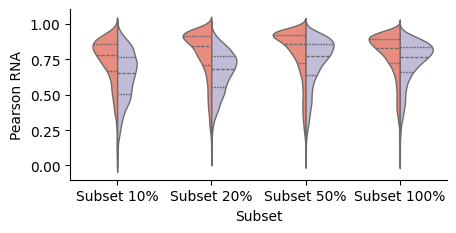

In [8]:
combined_df_rna['pearson_rna'] = pd.to_numeric(combined_df_rna['pearson_rna'], errors='coerce')
ax = sns.catplot(
    data=combined_df_rna, hue='Model', y='pearson_rna', x='Subset', split=True, kind="violin", inner="quartile", linewidth=1., 
    width=0.7, palette=my_col, legend=False
)

ax.set_axis_labels("Subset", "Pearson RNA")

ax.figure.set_size_inches(4.5, 2)
plt.savefig('figure11_1.svg', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

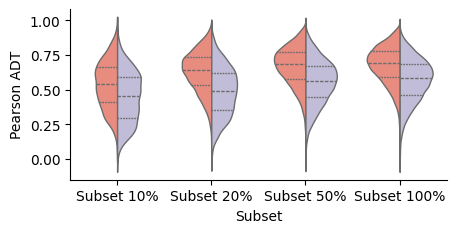

In [9]:
combined_df_adt['pearson_adt'] = pd.to_numeric(combined_df_adt['pearson_adt'], errors='coerce')
ax = sns.catplot(
    data=combined_df_adt, hue='Model', y='pearson_adt', x='Subset', split=True, kind="violin", inner="quartile", linewidth=1., 
    width=0.7, palette=my_col, legend=False
)

ax.set_axis_labels("Subset", "Pearson ADT")

ax.figure.set_size_inches(4.5, 2)
plt.savefig('figure11_2.svg', dpi = 300, bbox_inches = 'tight', pad_inches = 0)